# Part I - Communicate findings from Prosper Loan Data
## by Ishimwe Ntaganda Doriane

## Introduction

> This project will explore the factors considered when giving loans at Prosper Marketplace Inc. a company that provides loans to borrowers. The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Based on the mentioned variables a loan can be granted or denied.


## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('ProsperLoanData.csv')

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#check null variables
df.isnull().sum().head(30)

ListingKey                        0
ListingNumber                     0
ListingCreationDate               0
CreditGrade                   84984
Term                              0
LoanStatus                        0
ClosedDate                    58848
BorrowerAPR                      25
BorrowerRate                      0
LenderYield                       0
EstimatedEffectiveYield       29084
EstimatedLoss                 29084
EstimatedReturn               29084
ProsperRating (numeric)       29084
ProsperRating (Alpha)         29084
ProsperScore                  29084
ListingCategory (numeric)         0
BorrowerState                  5515
Occupation                     3588
EmploymentStatus               2255
EmploymentStatusDuration       7625
IsBorrowerHomeowner               0
CurrentlyInGroup                  0
GroupKey                     100596
DateCreditPulled                  0
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
FirstRecordedCreditLine     

In [5]:
df.nunique().sort_values(ascending=False).head(30)

ListingKey                         113066
LoanNumber                         113066
LoanKey                            113066
ListingNumber                      113066
ListingCreationDate                113064
DateCreditPulled                   112992
MemberKey                           90831
LP_InterestandFees                  78751
LP_CustomerPayments                 78523
LP_CustomerPrincipalPayments        49828
RevolvingCreditBalance              38555
AvailableBankcardCredit             31829
MonthlyLoanPayment                  23567
LP_ServiceFees                      19813
LP_GrossPrincipalLoss               15848
LP_NetPrincipalLoss                 15709
ProsperPrincipalOutstanding         13875
StatedMonthlyIncome                 13502
FirstRecordedCreditLine             11585
AmountDelinquent                     7059
BorrowerAPR                          6677
LP_CollectionFees                    6175
OpenRevolvingMonthlyPayment          2834
ClosedDate                        

In [6]:
#choose the columns to be used
cols_tobeused = ['LoanOriginationDate', 'Recommendations', 'Investors','ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)','BorrowerState','EmploymentStatus',
    'IsBorrowerHomeowner','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'LoanOriginalAmount','ListingCreationDate','Term', 'LoanStatus', 'BorrowerAPR','BorrowerRate','EstimatedReturn']
df_cols_tobeused = df[cols_tobeused]

In [7]:
#check
df_cols_tobeused.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginationDate        113937 non-null  object 
 1   Recommendations            113937 non-null  int64  
 2   Investors                  113937 non-null  int64  
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   DelinquenciesLast7Years    112947 non-null  float64
 10  StatedMonthlyIncome        113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  ListingCreationDate        113937 non-null  object 
 13  Term                       11

In [8]:
#check null values
df_cols_tobeused.isnull().sum()

LoanOriginationDate              0
Recommendations                  0
Investors                        0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
EmploymentStatus              2255
IsBorrowerHomeowner              0
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
LoanOriginalAmount               0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
EstimatedReturn              29084
dtype: int64

In [9]:
#Percentage null values
percent_missing = df_cols_tobeused.isnull().sum() * 100 / len(df_cols_tobeused)

In [10]:
percent_missing

LoanOriginationDate           0.000000
Recommendations               0.000000
Investors                     0.000000
ProsperRating (Alpha)        25.526387
ProsperScore                 25.526387
ListingCategory (numeric)     0.000000
BorrowerState                 4.840394
EmploymentStatus              1.979164
IsBorrowerHomeowner           0.000000
DelinquenciesLast7Years       0.868901
StatedMonthlyIncome           0.000000
LoanOriginalAmount            0.000000
ListingCreationDate           0.000000
Term                          0.000000
LoanStatus                    0.000000
BorrowerAPR                   0.021942
BorrowerRate                  0.000000
EstimatedReturn              25.526387
dtype: float64

In [11]:
#replace null values with 0
float_cols = df_cols_tobeused.loc[:,df_cols_tobeused.dtypes==float]
float_cols.fillna(0,inplace=True)

In [12]:
df_cols_tobeused.isnull().sum()

LoanOriginationDate              0
Recommendations                  0
Investors                        0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
EmploymentStatus              2255
IsBorrowerHomeowner              0
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
LoanOriginalAmount               0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
EstimatedReturn              29084
dtype: int64

In [13]:
df_cols_tobeused.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginationDate        113937 non-null  object 
 1   Recommendations            113937 non-null  int64  
 2   Investors                  113937 non-null  int64  
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   DelinquenciesLast7Years    112947 non-null  float64
 10  StatedMonthlyIncome        113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  ListingCreationDate        113937 non-null  object 
 13  Term                       11

In [14]:
#cleaning datatype from object into datetime datatype
df_cols_tobeused['LoanOriginationDate'] = pd.to_datetime(df_cols_tobeused['LoanOriginationDate'])
df_cols_tobeused['ListingCreationDate'] = pd.to_datetime(df_cols_tobeused['ListingCreationDate'])
df_cols_tobeused['ProsperScore'] = df_cols_tobeused['ProsperScore'].astype('category')

In [15]:
df_cols_tobeused.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginationDate        113937 non-null  datetime64[ns]
 1   Recommendations            113937 non-null  int64         
 2   Investors                  113937 non-null  int64         
 3   ProsperRating (Alpha)      84853 non-null   object        
 4   ProsperScore               84853 non-null   category      
 5   ListingCategory (numeric)  113937 non-null  int64         
 6   BorrowerState              108422 non-null  object        
 7   EmploymentStatus           111682 non-null  object        
 8   IsBorrowerHomeowner        113937 non-null  bool          
 9   DelinquenciesLast7Years    112947 non-null  float64       
 10  StatedMonthlyIncome        113937 non-null  float64       
 11  LoanOriginalAmount         113937 non-null  int64   

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables

## What are distribution of float variables ?

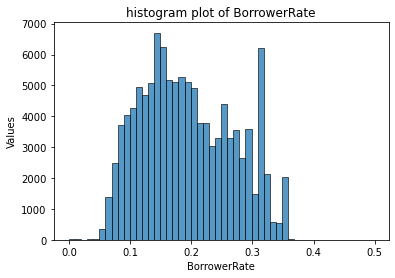

In [16]:
sb.histplot(data=float_cols,x='BorrowerRate',bins=50)
plt.xlabel('BorrowerRate')
plt.ylabel('Values')
plt.title(f'histogram plot of BorrowerRate')
plt.show()

The above histogram shows that the distribution of BorrowerRate is normal

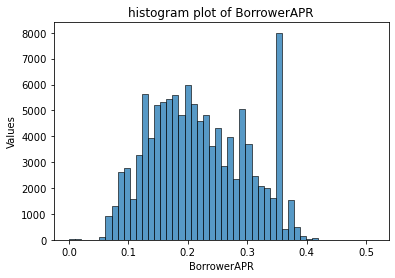

In [17]:
sb.histplot(data=float_cols,x='BorrowerAPR',bins=50)
plt.xlabel('BorrowerAPR')
plt.ylabel('Values')
plt.title(f'histogram plot of BorrowerAPR')
plt.show()

As per above histogram, there is approximately normal distribution in the annual percentage rates with two outliers with abnormal counts at 0.36% and at 0.37%. the APR frequencies tend to grow as the APR rise from around 0.05% up to 0.2% and then the frequencies decay as APR rises toward 0.4%

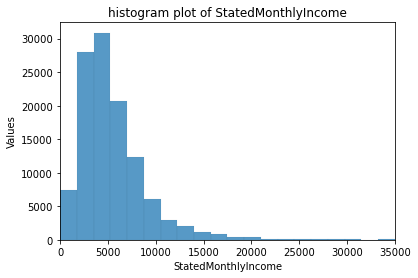

In [18]:
sb.histplot(data=float_cols,x='StatedMonthlyIncome',bins=1000)
plt.xlabel('StatedMonthlyIncome')
plt.xlim(0,35000)
plt.ylabel('Values')
plt.title(f'histogram plot of StatedMonthlyIncome')
plt.show()

the above historical shows that it is a left skewed distribution which also can be interpreted as negatively-skewed distribution

## What are the values counted for each qualitative variables?

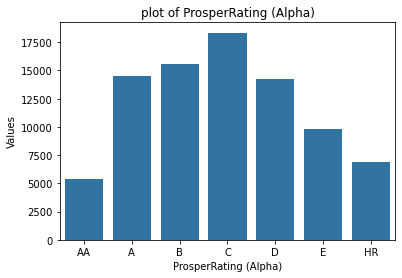

In [19]:
ratings_ordered = ['AA', 'A', 'B','C','D','E','HR']
df_cols_tobeused['ProsperRating (Alpha)'] = pd.Categorical(df_cols_tobeused['ProsperRating (Alpha)'], categories=ratings_ordered, ordered=True)
sb.countplot(data=df_cols_tobeused,x='ProsperRating (Alpha)',color=sb.color_palette()[0])
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Values')
plt.title(f'plot of ProsperRating (Alpha)')
plt.show()

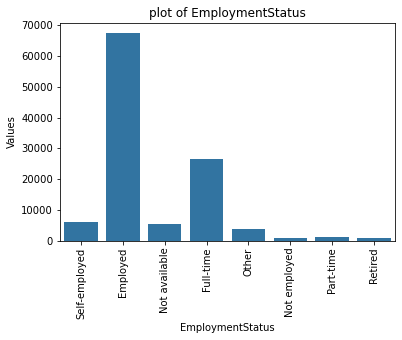

In [20]:
sb.countplot(data=df_cols_tobeused,x='EmploymentStatus',color=sb.color_palette()[0])
plt.xlabel('EmploymentStatus')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.title(f'plot of EmploymentStatus')
plt.show()

In [21]:
df_cols_tobeused['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

Most of the borrowers are employed which is 59%, and 24% are working full-time.

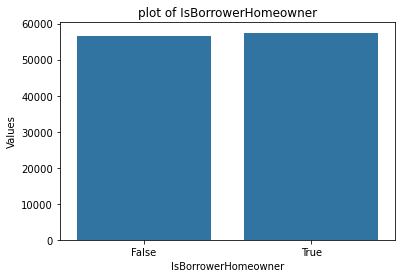

In [22]:
sb.countplot(data=df_cols_tobeused,x='IsBorrowerHomeowner',color=sb.color_palette()[0])
plt.xlabel('IsBorrowerHomeowner')
plt.ylabel('Values')
plt.title(f'plot of IsBorrowerHomeowner')
plt.show()

In [23]:
df_cols_tobeused['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

The owner and the borrower are equal,meaning 50% of the borrowers are homeowners.

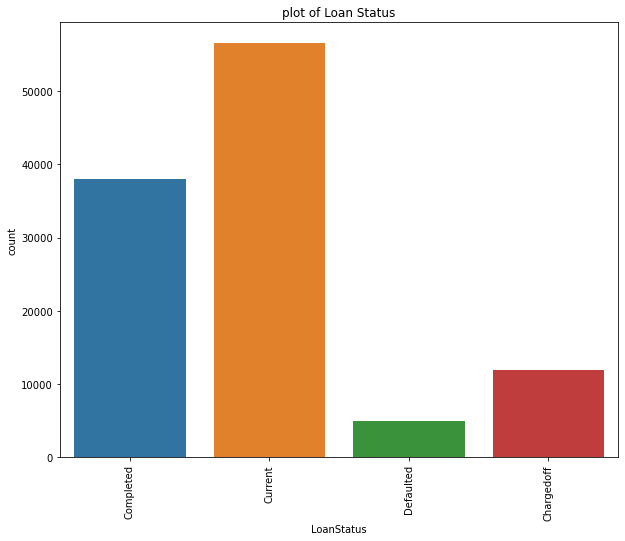

In [24]:
loan_df = df_cols_tobeused[df_cols_tobeused['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])]
plt.figure(figsize=(10,8))
plt.ylabel('Values')
plt.title(f'plot of Loan Status')
sb.countplot(data=loan_df ,x='LoanStatus')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90);

The majority of loans are in Current and Completed, although there is significant number of Defaulted loans of Defaulted

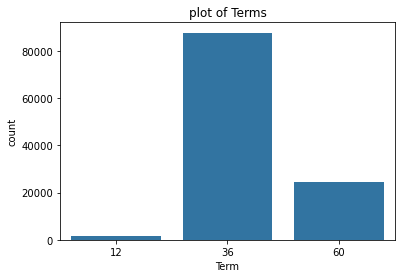

In [25]:
# fig,ax=plt.subplots(nrows=3,figsize=[8,8])
default_color=sb.color_palette()[0]
plt.title(f'plot of Terms')
sb.countplot(data=df_cols_tobeused,x='Term',color=default_color);

Per the above chat, a higher number of people prefer 3 years which is Term 36

In [26]:
df_cols_tobeused.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginationDate        113937 non-null  datetime64[ns]
 1   Recommendations            113937 non-null  int64         
 2   Investors                  113937 non-null  int64         
 3   ProsperRating (Alpha)      84853 non-null   category      
 4   ProsperScore               84853 non-null   category      
 5   ListingCategory (numeric)  113937 non-null  int64         
 6   BorrowerState              108422 non-null  object        
 7   EmploymentStatus           111682 non-null  object        
 8   IsBorrowerHomeowner        113937 non-null  bool          
 9   DelinquenciesLast7Years    112947 non-null  float64       
 10  StatedMonthlyIncome        113937 non-null  float64       
 11  LoanOriginalAmount         113937 non-null  int64   

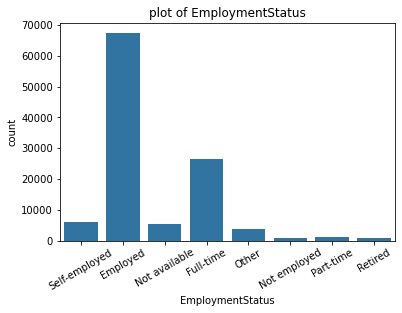

In [27]:
sb.countplot(data=df_cols_tobeused,x='EmploymentStatus',color=default_color)
plt.title(f'plot of EmploymentStatus')
plt.xticks(rotation=30);

the plot above shows that among all employment status,those who are employed are many compared to others

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [28]:
df_cols_tobeused.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginationDate        113937 non-null  datetime64[ns]
 1   Recommendations            113937 non-null  int64         
 2   Investors                  113937 non-null  int64         
 3   ProsperRating (Alpha)      84853 non-null   category      
 4   ProsperScore               84853 non-null   category      
 5   ListingCategory (numeric)  113937 non-null  int64         
 6   BorrowerState              108422 non-null  object        
 7   EmploymentStatus           111682 non-null  object        
 8   IsBorrowerHomeowner        113937 non-null  bool          
 9   DelinquenciesLast7Years    112947 non-null  float64       
 10  StatedMonthlyIncome        113937 non-null  float64       
 11  LoanOriginalAmount         113937 non-null  int64   

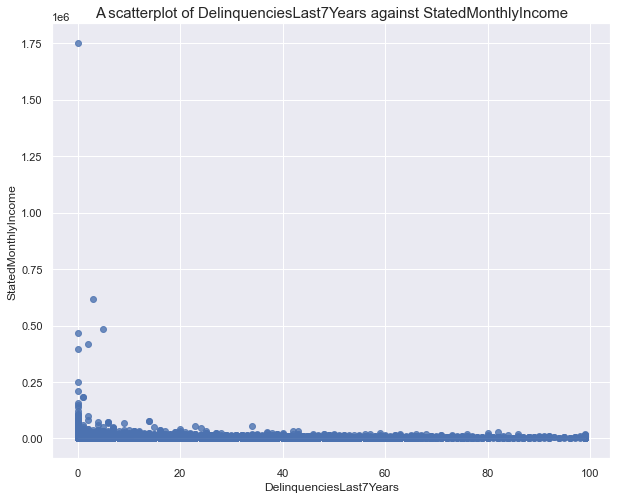

In [29]:
plt.figure(figsize=(10,8))
sb.set()
sb.regplot(data = df_cols_tobeused, x = 'DelinquenciesLast7Years', y = 'StatedMonthlyIncome' );
plt.title(f'A scatterplot of DelinquenciesLast7Years against StatedMonthlyIncome',fontsize=15 )
plt.show()

this plot highlights the relationship between DelinquenciesLast7Years and Statemonthlyincome which show no relationship between the 2 because their plot does not give a clear picture to analyze those variables

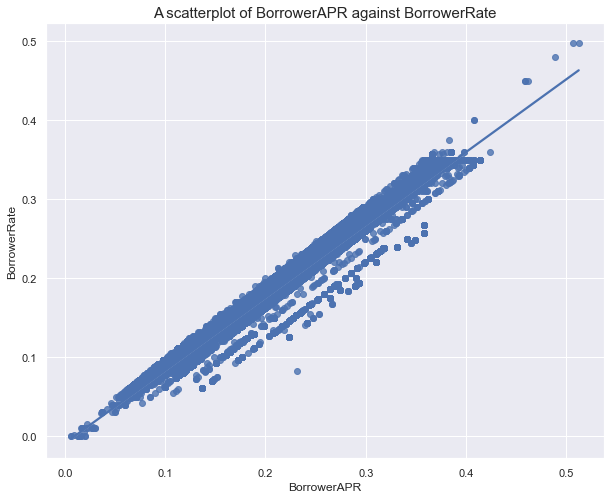

In [30]:
plt.figure(figsize=(10,8))
sb.set()
sb.regplot(data = df_cols_tobeused, x = 'BorrowerAPR', y = 'BorrowerRate' );
plt.title(f'A scatterplot of BorrowerAPR against BorrowerRate',fontsize=15 )
plt.show()

this plot highlights the relationship between BorrowerAPR and BorrowerRate,there is linear relationship which means we have a Positive trend

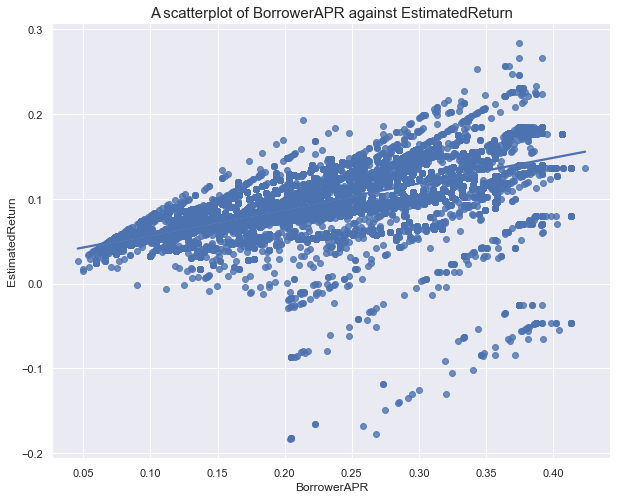

In [31]:
plt.figure(figsize=(10,8))
sb.set()
sb.regplot(data = df_cols_tobeused, x = 'BorrowerAPR', y = 'EstimatedReturn' );
plt.title(f'A scatterplot of BorrowerAPR against EstimatedReturn',fontsize=15 )
plt.show()

this plot highlights the relationship between BorrowerAPR and EstimatedReturn is a fairly positive trend

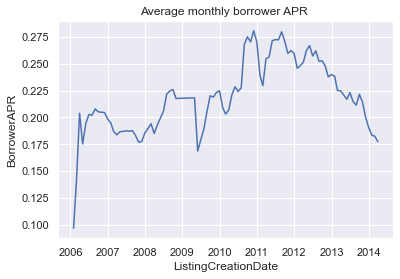

In [32]:
monthly_rate = df_cols_tobeused.set_index('ListingCreationDate').resample('M').mean()
sb.lineplot(monthly_rate.index,monthly_rate['BorrowerAPR'])
plt.title("Average monthly borrower APR ");

The average monthly Borrower rates generally increased from 2006 at 0.10 to 2009 at 0.175 where it decreased ,from 2010 to 2014 it increased again

In [33]:
loan_df = df_cols_tobeused[df_cols_tobeused['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])]

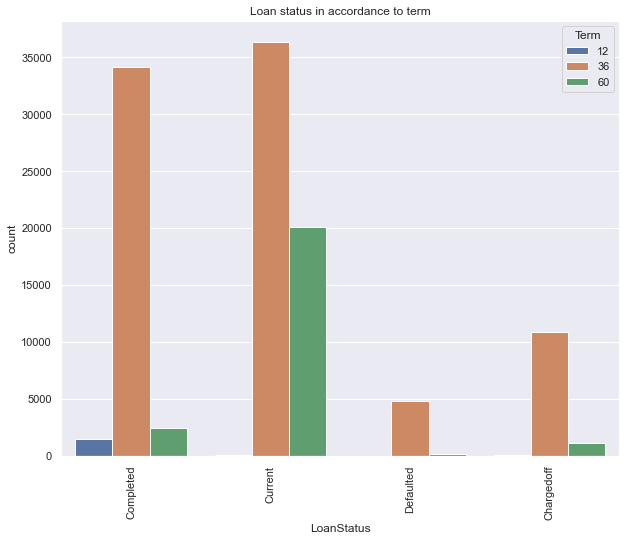

In [34]:
plt.figure(figsize=(10,8))
sb.countplot(data=loan_df ,x='LoanStatus', hue='Term')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loan status in accordance to term")
plt.xticks(rotation=90);

This Chat depicts the loan status in accordance to term. Those in current category outweighs others

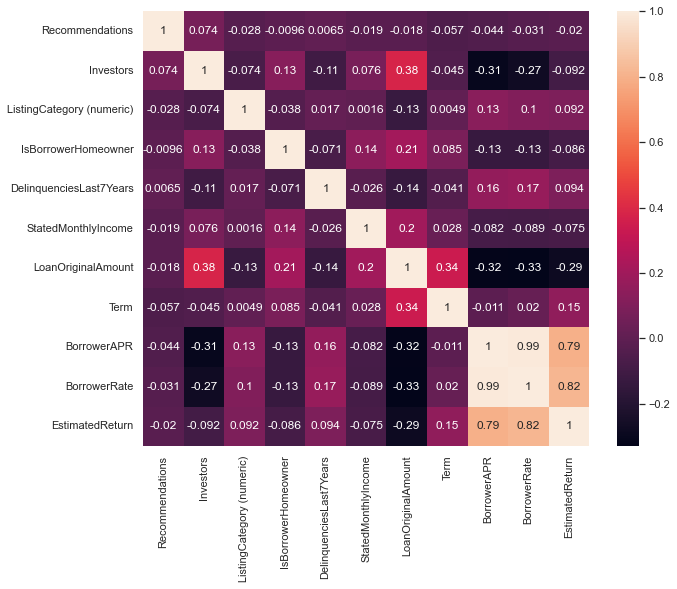

In [35]:
plt.figure(figsize=(10,8))
corr_matrix = df_cols_tobeused.corr()
sb.heatmap(corr_matrix,annot=True);

There are two strong positive relationships between Borrower Rate and Borrower PR, and between Borrower PR and Estimated Return, this means the rates and returns are dependent to borrower APR. Borrower PR and Prosper Score are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher Credit Score means the borrowers are more trustworthy, therefore it received lower APR.

## Multiriate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## What is the relationship between multiple variables in Dataset?

In [36]:
def countplot(x, hue,**kwargs):
    data=kwargs.pop("data")
    order=np.unique(data['LoanStatus'].values)
    sb.countplot(x, hue=hue, data=data,order=order,**kwargs)

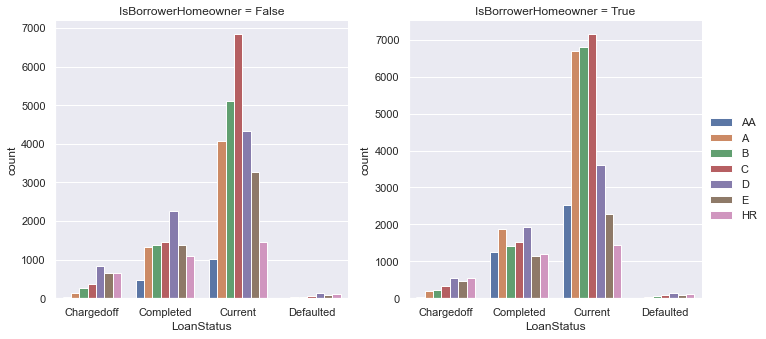

In [37]:
g = sb.FacetGrid(loan_df, col='IsBorrowerHomeowner',  size=5, height=3, aspect=1, sharex=False, sharey=False)
g.map_dataframe(countplot, 'LoanStatus',hue='ProsperRating (Alpha)', alpha=.99,
palette=sb.color_palette())
g.fig.subplots_adjust(top=0.9)
g.add_legend();

In both those who own their home and those who don’t, current category has a higher number of people, Secondly B category has the highest count of rating in those who rent whereas in those who own their number, it is HR.

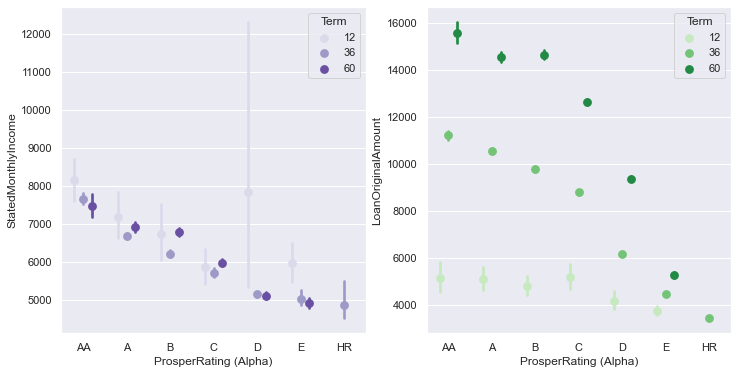

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loan_df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan_df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

Now looking at the rating and term effects on stated monthly income and loan original amount variables.

For stated monthly income, it does not appear that there is an interaction effect between term and rating; the pattern of term is consistent across ratings.However, there is a relationship between term and rating for loan amount.
We can observe that when our Prosper rating improves, the loan amount of all three terms grows, as does the increasing amplitude of loan amount between terms.

## Conclusions

>This project's goal was to gain insight from a dataset of loans from Prosper. It initially has 81 variables and 113,937 observations, although some aspects are less relevant and contain less data to be analyzed. This project consists of three kinds of analysis, univariate, bivariate, and multivariate, all help to comprehend the relationship between distinct features and gain deeper insights into the data

>In Univariate analysis, I tried to understand the distribution of quantitative columns and counts of qualitative columns using histogram and plots. I found out left skewed distribution and normal distribution. in qualitative columns, there was higher values and others with lower value. Also employed people are likely to apply for loans more than others

>In bivariate analysis, I tried to understand relationship between two variables. I have seen some quantitative variables with strong relationship. In 2011 and 2012 was the years where rates were very high compared to other years. Those in current category of loan status outweighs others meaning a higher number of people take 3 years’ loan which is term 36

>In multivariate analysis,it was discovered that there was no interaction effect between term and rating,the pattern of term is consistent across ratings.However, there is a relationship between term and rating for loan amount. We observed that when our Prosper rating improves, the loan amount of all three terms grows, as does the increasing amplitude of loan amount between 

